In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time 
import os, sys

In [2]:
likelihood_path = os.path.realpath(os.path.join(os.getcwd(),'..'))
sys.path.insert(0, likelihood_path)
print('Setting as working directory: ', likelihood_path)

Setting as working directory:  /home/santiago/CosmoProjects/EuclidIST/ISTL/likelihood-implementation


In [3]:
%matplotlib inline
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
plt.rc('font',size=25)
plt.rc('axes', titlesize=26)
plt.rc('axes', labelsize=25)
plt.rc('lines', linewidth=2)
plt.rc('lines', markersize=6)
plt.rc('legend', fontsize=20)
plt.rc('mathtext', fontset='stix')
plt.rc('font', family='STIXGeneral')

In [4]:

# We are running the Euclid-Likelihood as an external likelihood class for Cobaya
# Cobaya needs a dictionary or yaml file as input to start running
# This dictionary below ('info') can be modified up to some point by the user to
# adapt it to the user's needs.
# The options that can be modified by the user are pointed with the acronym (UC).

info = {
    #'params': Cobaya's protected key of the input dictionary. 
    # Includes the parameters that the user would like to sample over:
'params': {
        # (UC): each parameter below (which is a 'key' of another sub-dictionary) can contain a dictionary
        # with the key 'prior', 'latex'...
        # If the prior dictionary is not passed to a parameter, this parameter is fixed.
        # In this example, we are sampling the parameter ns
        # For more information see: https://cobaya.readthedocs.io/en/latest/example.html
        'ombh2': 0.022445, #Omega density of baryons times the reduced Hubble parameter squared
        'omch2': 0.1205579307, #Omega density of cold dark matter times the reduced Hubble parameter squared
        'H0': 67.0, #Hubble parameter evaluated today (z=0) in km/s/Mpc
        'tau': 0.0925, #optical depth
        'mnu': 0.06, #  sum of the mass of neutrinos in eV
        'nnu': 3.046, #N_eff of relativistic species 
        'As': 2.12605e-9, #Amplitude of the primordial scalar power spectrum
        'ns': {'prior':{'min':0.8, 'max':1.2}}, # primordial power spectrum tilt (sampled with an uniform prior)
        'w': -1.0, #Dark energy fluid model
        'wa': 0.0, #Dark energy fluid model
        'omk': 0.0, #curvature density
        'omegam': None, #DERIVED parameter: Omega matter density
        'omegab': None, #DERIVED parameter: Omega baryon density
        'omeganu': None, #DERIVED parameter: Omega neutrino density
        'omnuh2': None, #DERIVED parameter: Omega neutrino density times de reduced Hubble parameter squared
        'omegac': None, #DERIVED parameter: Omega cold dark matter density
        'N_eff': None,
        # (UC): galaxy bias parameters:
        # The bias parameters below are currently fixed to the
        # values used by the Inter Science Taskforce: Forecast (IST:F)
        # and presented in the corresponding IST:F paper (arXiv: 1910.09273).
        # However, they can be changed by the user and even sample over them by putting a prior
        # Photometric bias parameters
        'b1_photo': 1.0997727037892875,
        'b2_photo': 1.220245876862528,
        'b3_photo': 1.2723993083933989,
        'b4_photo': 1.316624471897739,
        'b5_photo': 1.35812370570578,
        'b6_photo': 1.3998214171814918,
        'b7_photo': 1.4446452851824907,
        'b8_photo': 1.4964959071110084,
        'b9_photo': 1.5652475842498528,
        'b10_photo': 1.7429859437184225,
        # Magnification bias parameters
        'magnification_bias_1': 0.0,
        'magnification_bias_2': 0.0,
        'magnification_bias_3': 0.0,
        'magnification_bias_4': 0.0,
        'magnification_bias_5': 0.0,
        'magnification_bias_6': 0.0,
        'magnification_bias_7': 0.0,
        'magnification_bias_8': 0.0,
        'magnification_bias_9': 0.0,
        'magnification_bias_10': 0.0,
        # Shear calibration multiplicative bias parameters                                                                                                                                                                                                                                                                                                            
        'multiplicative_bias_1': 0.0,
        'multiplicative_bias_2': 0.0,
        'multiplicative_bias_3': 0.0,
        'multiplicative_bias_4': 0.0,
        'multiplicative_bias_5': 0.0,
        'multiplicative_bias_6': 0.0,
        'multiplicative_bias_7': 0.0,
        'multiplicative_bias_8': 0.0,
        'multiplicative_bias_9': 0.0,
        'multiplicative_bias_10': 0.0,
        # Spectroscopic bias parameters
        'b1_spectro': 1.46,
        'b2_spectro': 1.61,
        'b3_spectro': 1.75,
        'b4_spectro': 1.90,
        # Intrinsic alignment parameters
        'aia': 1.72,
        'nia': -0.41,
        'bia': 0.0,
        # Redshift distributions nuisance parameters: shifts
        'dz_1_GCphot': 0.0, 'dz_1_WL': 0.0,
        'dz_2_GCphot': 0.0, 'dz_2_WL': 0.0,
        'dz_3_GCphot': 0.0, 'dz_3_WL': 0.0,
        'dz_4_GCphot': 0.0, 'dz_4_WL': 0.0,
        'dz_5_GCphot': 0.0, 'dz_5_WL': 0.0,
        'dz_6_GCphot': 0.0, 'dz_6_WL': 0.0,
        'dz_7_GCphot': 0.0, 'dz_7_WL': 0.0,
        'dz_8_GCphot': 0.0, 'dz_8_WL': 0.0,
        'dz_9_GCphot': 0.0, 'dz_9_WL': 0.0,
        'dz_10_GCphot': 0.0, 'dz_10_WL': 0.0},
    #'theory': Cobaya's protected key of the input dictionary.
    # Cobaya needs to ask some minimum theoretical requirements to a Boltzman Solver
    # (UC): you can choose between CAMB or CLASS
    # In this DEMO, we use CAMB and specify some CAMB arguments
    # such as the number of massive neutrinos
    # and the dark energy model
    #
    # ATTENTION: If you have CAMB/CLASS already installed and 
    # you are not using the likelihood conda environment 
    # or option (2) in cell (3) (Cobaya modules), you can add an extra key called 'path' within the camb dictionary
    # to point to your already installed CAMB code
    # NOTE: for values of the non-linear flag larger than 0, a new key is added in info['theory']['camb']['extra_args'],
    # i.e. 'halofit_version', which contains the requested version of halofit, as described above
    'theory': {'camb': 
               {'stop_at_error': True, 
                'extra_args':{'num_massive_neutrinos': 1,
                              'dark_energy_model': 'ppf'}}},
    #'sampler': Cobaya's protected key of the input dictionary.
    # (UC): you can choose the sampler you want to use.
    # Check Cobaya's documentation to see the list of available samplers
    # In this DEMO, we use the 'evaluate' sampler to make a single computation of the posterior distributions
    # Note: if you want to run a simple MCMC sampling choose 'mcmc'
    'sampler': {'evaluate': None},  
    # 'packages_path': Cobaya's protected key of the input dictionary.
    # This is the variable you need to update
    # if you are running Cobaya with cobaya_modules (option (2) above).
    # If you are using the conda likelihood environment or option (1),
    # please, keep the line below commented
    #
    #'packages_path': modules_path,
    #
    #'output': Cobaya's protected key of the input dictionary.
    # Where are the results going to be stored, in case that the sampler produce output files? 
    # For example: chains...
    # (UC): modify the path below within 'output' to choose a name and a directory for those files
    'output': 'chains/my_euclid_experiment',
    #'debug': Cobaya's protected key of the input dictionary.
    # (UC): how much information you want Cobaya to print? If debug: True, it prints every single detail
    # that is going on internally in Cobaya
    'debug': False,
    #'timing': Cobaya's protected key of the input dictionary.
    # (UC): if timing: True, Cobaya returns how much time it took it to make a computation of the posterior
    # and how much time take each of the modules to perform their tasks
    'timing': True,
    #'force': Cobaya's protected key of the input dictionary.
    # (UC): if 'force': True, Cobaya forces deleting the previous output files, if found, with the same name
    'force': True,
    }

In [5]:
# Import external loglike from the Likelihood Package within cobaya_interface.py

from cloe.cobaya_interface import EuclidLikelihood

In [6]:
#'likelihood': Cobaya's protected key of the input dictionary.
# (UC): The user can select which data wants to use for the analysis.
# Check Cobaya's documentation to see the list of the current available data experiments
# In this DEMO, we load the Euclid-Likelihood as an external function, and name it 'Euclid'
info['likelihood'] = {'Euclid': 
                     {'external': EuclidLikelihood, # Likelihood Class to be read as external
                     # Note: everything down below will overwrite the information read
                     # in the config folder
                     #
                     # Select which observables want to use during the analysis
                     'observables_selection': {
                         'WL': {'WL': True, 'GCphot': False, 'GCspectro': False},
                         'GCphot': {'GCphot': True, 'GCspectro': False},
                         'GCspectro': {'GCspectro': True}
                     },
                     # Plot the selected observables matrx
                     'plot_observables_selection': True,  
                      # Non-linear flag
                      # With this, the user can specify which non-linear model they want
                      # For the time-being the available options are: 
                            #0 -> linear-only
                            #1 -> Takahashi
                            #2 -> Mead2020 (w/o baryon corrections)
                     'NL_flag': 0,
                     #
                     #'data': This give specifications for the paths of the input data files
                     'data': { 
                        #'sample' specifies the first folder below the main data folder
                        'sample': 'ExternalBenchmark',
                        #'spectro' and 'photo' specify paths to data files.
                        'spectro': {
                            # GC Spectro root name should contain z{:s} string
                            # to enable iteration over bins
                            'root': 'cov_power_galaxies_dk0p004_z{:s}.fits',
                            'redshifts': ["1.", "1.2", "1.4", "1.65"]},
                        'photo': {
                            'ndens_GC': 'niTab-EP10-RB00.dat',
                            'ndens_WL': 'niTab-EP10-RB00.dat',
                            # Photometric root names should contain z{:s} string
                            # to specify IA model
                            'root_GC': 'Cls_{:s}_PosPos.dat',
                            'root_WL': 'Cls_{:s}_ShearShear.dat',
                            'root_XC': 'Cls_{:s}_PosShear.dat',
                            'IA_model': 'zNLA',
                            # Photometric covariances root names should contain z{:s} string
                            # to specify how the covariance was calculated
                            'cov_GC': 'CovMat-PosPos-{:s}-20Bins.npy',
                            'cov_WL': 'CovMat-ShearShear-{:s}-20Bins.npy',
                            'cov_3x2pt': 'CovMat-3x2pt-{:s}-20Bins.npy',
                            'cov_model': 'Gauss'}}, 
                   
                    }}

[model] *WARNING* Ignored blocks/options: ['sampler', 'output', 'force']
[CAMB] Importing *global* CAMB.
[camb] Initialized!


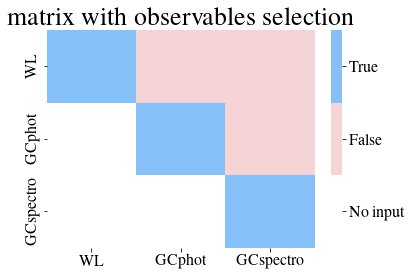

[CAMB] Importing *global* CAMB.
[camb] Initialized!
[model] *WARNING* Theories {camb.transfers, camb} do not appear to be actually used for anything


/home/santiago/CosmoProjects/EuclidIST/ISTL/likelihood-implementation/cloe/photometric_survey/photo.py:162: UserWarning: Bessel tables have been set with the specified angular separations. Computing 3x2pt correlation functions at different angles will lead to unexpected outputs.
  warnings.warn('Bessel tables have been set with the specified angular '


Time for initialization of the likelihood:  7.89467453956604


In [7]:
# First: import model wrapper of Cobaya 
from cobaya.model import get_model

# The `get_model` function of Cobaya imported in the line above needs a yaml or dictionary as an argument
# exactly the same as the function `run` in cell 9 also needs.
#
# We measure the time to give us an estimation of how much time it takes to make the initialization of the
# likelihood

t1 = time.time()

# Second: create an instance of the `model` wrapper called model
model = get_model(info)
print('Time for initialization of the likelihood: ', time.time()-t1)

In [8]:
# (1) Requirements needed by the likelihood code.
# That means, which quantities are we asking to the Boltzman (CAMB/CLASS) through Cobaya?
print('\n Requirements \n')
print(model.provider.requirement_providers)
# (2) At which values have the requirements been requested (redshift, scales...)?
print('\n Requested \n')
print(model.requested())


 Requirements 

{'omegam': camb, 'omegab': camb, 'omegac': camb, 'omnuh2': camb, 'omeganu': camb, 'Pk_interpolator': camb, 'comoving_radial_distance': camb, 'angular_diameter_distance': camb, 'Hubble': camb, 'sigma8_z': camb, 'fsigma8': camb, 'CAMBdata': camb, 'CAMB_transfers': camb.transfers}

 Requested 

{'camb.transfers': [{'CAMB_transfers':{'non_linear': False, 'needs_perts': False}}, {'CAMB_transfers':{'non_linear': False, 'needs_perts': True}}], 'camb': [{'omegam':None}, {'omegab':None}, {'omeganu':None}, {'omnuh2':None}, {'omegac':None}, {'N_eff':None}, {'Pk_interpolator':{}}, {'comoving_radial_distance':{'z': array([0.        , 0.04040404, 0.08080808, 0.12121212, 0.16161616,
       0.2020202 , 0.24242424, 0.28282828, 0.32323232, 0.36363636,
       0.4040404 , 0.44444444, 0.48484848, 0.52525253, 0.56565657,
       0.60606061, 0.64646465, 0.68686869, 0.72727273, 0.76767677,
       0.80808081, 0.84848485, 0.88888889, 0.92929293, 0.96969697,
       1.01010101, 1.05050505, 1.09090

In [9]:
# At the moment, we are sampling only ns
# if there are sampled parameters, we need first to obtain a value from the prior
# i.e: (FIRST)
point = dict(zip(model.parameterization.sampled_params(),
                 model.prior.sample(ignore_external=True)[0]))
t1 = time.time()
# (3) Make a computation of the logposterior on that point
logposterior = model.logposterior(point)
# If there were no sampled parameters, you can simply do
#logposterior = model.logposterior({})
t2 = time.time()

# Note that we are measuring the time for illustration purposes only.

print('Time to compute the logposterior: ', t2-t1)
print('Full log-posterior:')
print('   logposterior: %g' % logposterior.logpost)
print('   logpriors: %r' % dict(zip(list(model.prior), logposterior.logpriors)))
print('   loglikelihoods: %r' % dict(zip(list(model.likelihood), logposterior.loglikes)))
print('   derived params: %r' % dict(zip(list(model.parameterization.derived_params()), logposterior.derived)))

Time to compute the logposterior:  28.603824853897095
Full log-posterior:
   logposterior: -886303
   logpriors: {'0': 0.9162907318741553}
   loglikelihoods: {'Euclid': -886304.0374504963}
   derived params: {'omegam': 0.32000015392946796, 'omegab': 0.04999999999999999, 'omeganu': 0.0014371539294679853, 'omnuh2': 0.0006451383989381787, 'omegac': 0.26856299999999994, 'N_eff': 3.0460000000000003}


In [277]:
# Create an instance of the class EuclidLikelihood
like = EuclidLikelihood()

# Initialize default parameters for redshift, k-array, fiducial cosmology...
like.initialize()

# Get the cosmo_dictionary where all the cosmology + theory parameters are saved
# ATTENTION: as explained above, you need to pass the `cobaya wrapper model` initialized 
# in CASE 2 as an argument of the function, as well as the parameters of your theory.
# In CASE 1, when only Cobaya run is used, it creates internally this `model` instance itself
like.passing_requirements(model, info, **model.provider.params)

# Update the cosmology dictionary with interpolators + basic quantities such as
# P_gg, P_delta...
like.cosmo.update_cosmo_dic(like.cosmo.cosmo_dic['z_win'], 0.05)

# Show what the cosmo_dic actually contains
print('\nKeys of the cosmo_dic: \n', list(like.cosmo.cosmo_dic.keys()))
print('\nKeys of the nuisance params within cosmo_dic: \n', list(like.cosmo.cosmo_dic['nuisance_parameters'].keys()))

/home/santiago/CosmoProjects/EuclidIST/ISTL/likelihood-implementation/cloe/auxiliary/observables_dealer.py:68: UserWarning: Attention: CLOE only computes cross-correlations for the photometric survey!
  warnings.warn(
/home/santiago/CosmoProjects/EuclidIST/ISTL/likelihood-implementation/cloe/auxiliary/observables_dealer.py:71: UserWarning: Entries ['WL']['GCphot'] and ['GCphot']['GCspec'] are changed to False.
  warnings.warn(


[CAMB] Importing *global* CAMB.
[camb] Initialized!
[model] *WARNING* Theories {camb, camb.transfers} do not appear to be actually used for anything


/home/santiago/CosmoProjects/EuclidIST/ISTL/likelihood-implementation/cloe/photometric_survey/photo.py:162: UserWarning: Bessel tables have been set with the specified angular separations. Computing 3x2pt correlation functions at different angles will lead to unexpected outputs.
  warnings.warn('Bessel tables have been set with the specified angular '


[CAMB] Importing *global* CAMB.
[camb] Initialized!
[model] *WARNING* Theories {camb, camb.transfers} do not appear to be actually used for anything

Keys of the cosmo_dic: 
 ['H0', 'omch2', 'ombh2', 'omnuh2', 'Omnu', 'Omk', 'Omm', 'Omc', 'Omb', 'w', 'wa', 'gamma_MG', 'mnu', 'tau', 'nnu', 'ns', 'As', 'sigma8_0', 'c', 'MG_mu', 'MG_sigma', 'z_win', 'k_win', 'comov_dist', 'angular_dist', 'H', 'H_Mpc', 'fsigma8', 'sigma8', 'D_z_k', 'Pk_delta', 'Pk_halofit', 'Pk_weyl', 'Pk_weyl_NL', 'Pmm_phot', 'Pgg_phot', 'Pgdelta_phot', 'Pgg_spectro', 'Pgdelta_spectro', 'Pii', 'Pdeltai', 'Pgi_phot', 'Pgi_spectro', 'r_z_func', 'z_r_func', 'f_K_z_func', 'd_z_func', 'H_z_func', 'H_z_func_Mpc', 'D_z_k_func', 'sigma8_z_func', 'fsigma8_z_func', 'f_z', 'NL_boost', 'NL_flag', 'use_gamma_MG', 'nuisance_parameters', 'H0_Mpc', 'fid_d_z_func', 'fid_H_z_func', 'CAMBdata', 'b_inter']

Keys of the nuisance params within cosmo_dic: 
 ['b1_photo', 'b2_photo', 'b3_photo', 'b4_photo', 'b5_photo', 'b6_photo', 'b7_photo', 'b8

In [278]:
like.data

{'photo': {'IA_model': 'zNLA',
  'cov_3x2pt': 'CovMat-3x2pt-{:s}-20Bins.npy',
  'cov_GC': 'CovMat-PosPos-{:s}-20Bins.npy',
  'cov_WL': 'CovMat-ShearShear-{:s}-20Bins.npy',
  'cov_model': 'Gauss',
  'ndens_GC': 'niTab-EP10-RB00.dat',
  'ndens_WL': 'niTab-EP10-RB00.dat',
  'root_GC': 'Cls_{:s}_PosPos.dat',
  'root_WL': 'Cls_{:s}_ShearShear.dat',
  'root_XC': 'Cls_{:s}_PosShear.dat'},
 'sample': 'ExternalBenchmark',
 'spectro': {'redshifts': ['1.', '1.2', '1.4', '1.65'],
  'root': 'cov_power_galaxies_dk0p004_z{:s}.fits'}}

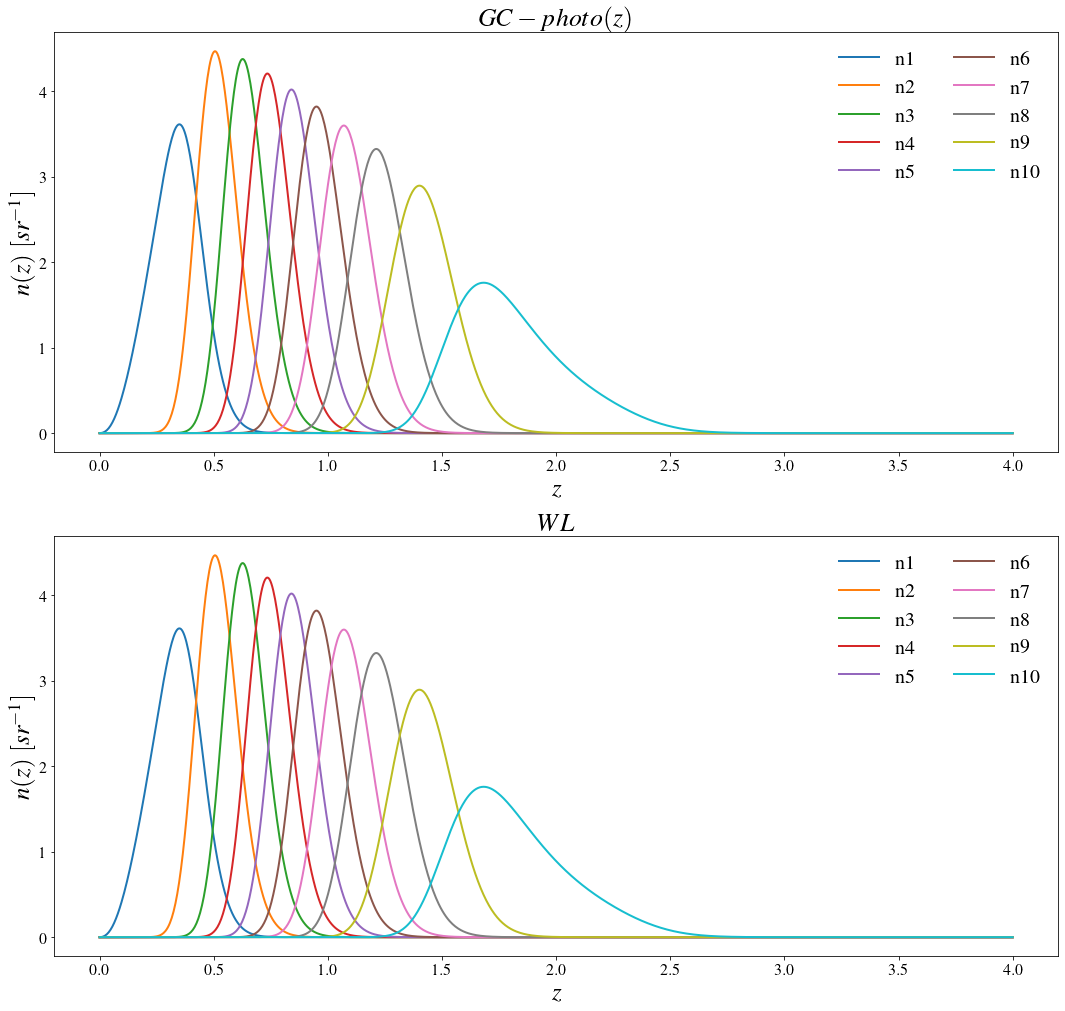

In [279]:
# i.e: let's plot the galaxy distributions for GC-photo(z) and WL (AT THE MOMENT, THEY ARE THE SAME)
zs = np.linspace(0, 4, 1000)
fig, axs = plt.subplots(2, 1, figsize=(18,17))
for key, value in like.likefinal.data_ins.nz_dict_GC_Phot.items():
    axs[0].plot(zs, value(zs), label = key)
for key, value in like.likefinal.data_ins.nz_dict_WL.items():
    axs[1].plot(zs, value(zs), label = key)
axs[0].set_xlabel(r'$z$')
axs[0].set_ylabel(r'$n(z)$ $[sr^{-1}]$')
axs[0].set_title(r'$GC-photo(z)$')
axs[0].legend(frameon=False, ncol=2)
axs[1].set_xlabel(r'$z$')
axs[1].set_ylabel(r'$n(z)$ $[sr^{-1}]$')
axs[1].set_title(r'$WL$')
axs[1].legend(frameon=False, ncol=2);
#plt.subplots_adjust(top=0.90)

In [280]:
# We can also plot the window functions for the photometric observables
# For that, you need to import the photo class and read the cosmology dictionary and the n(z) distributions above
from cloe.photometric_survey.photo import Photo
photo = Photo(like.cosmo.cosmo_dic, like.likefinal.data_ins.nz_dict_WL, like.likefinal.data_ins.nz_dict_GC_Phot)

In [290]:
like.cosmo.cosmo_dic.keys()

dict_keys(['H0', 'omch2', 'ombh2', 'omnuh2', 'Omnu', 'Omk', 'Omm', 'Omc', 'Omb', 'w', 'wa', 'gamma_MG', 'mnu', 'tau', 'nnu', 'ns', 'As', 'sigma8_0', 'c', 'MG_mu', 'MG_sigma', 'z_win', 'k_win', 'comov_dist', 'angular_dist', 'H', 'H_Mpc', 'fsigma8', 'sigma8', 'D_z_k', 'Pk_delta', 'Pk_halofit', 'Pk_weyl', 'Pk_weyl_NL', 'Pmm_phot', 'Pgg_phot', 'Pgdelta_phot', 'Pgg_spectro', 'Pgdelta_spectro', 'Pii', 'Pdeltai', 'Pgi_phot', 'Pgi_spectro', 'r_z_func', 'z_r_func', 'f_K_z_func', 'd_z_func', 'H_z_func', 'H_z_func_Mpc', 'D_z_k_func', 'sigma8_z_func', 'fsigma8_z_func', 'f_z', 'NL_boost', 'NL_flag', 'use_gamma_MG', 'nuisance_parameters', 'H0_Mpc', 'fid_d_z_func', 'fid_H_z_func', 'CAMBdata', 'b_inter'])

In [291]:
photo.WL_window(zs, 1)

array([ 3.16938043e-023,  4.24364706e-007,  8.38331281e-007,
        1.24181403e-006,  1.63473190e-006,  2.01700887e-006,
        2.38857432e-006,  2.74936344e-006,  3.09931754e-006,
        3.43838432e-006,  3.76651816e-006,  4.08368037e-006,
        4.38983931e-006,  4.68497061e-006,  4.96905727e-006,
        5.24208979e-006,  5.50406620e-006,  5.75499214e-006,
        5.99488085e-006,  6.22375320e-006,  6.44163768e-006,
        6.64857037e-006,  6.84459514e-006,  7.02976342e-006,
        7.20413403e-006,  7.36777317e-006,  7.52075424e-006,
        7.66315787e-006,  7.79507174e-006,  7.91659057e-006,
        8.02781597e-006,  8.12885639e-006,  8.21982711e-006,
        8.30085008e-006,  8.37205377e-006,  8.43357300e-006,
        8.48554890e-006,  8.52812875e-006,  8.56146591e-006,
        8.58571968e-006,  8.60105521e-006,  8.60764339e-006,
        8.60566083e-006,  8.59528972e-006,  8.57671760e-006,
        8.55013734e-006,  8.51574692e-006,  8.47374942e-006,
        8.42435283e-006,

In [292]:
zs.shape

(1000,)

In [293]:
dz_i = photo.theory['nuisance_parameters'][f'dz_{10}_WL']
dz_i

0.0

In [294]:
zint_mat = np.linspace(zs, zs[-1] + dz_i,
                               photo.z_trapz_sampling)


In [295]:
zint_mat.T

array([[0.        , 0.00801603, 0.01603206, ..., 3.98396794, 3.99198397,
        4.        ],
       [0.004004  , 0.01201201, 0.02002002, ..., 3.98398398, 3.99199199,
        4.        ],
       [0.00800801, 0.01600799, 0.02400798, ..., 3.98400003, 3.99200002,
        4.        ],
       ...,
       [3.99199199, 3.99200804, 3.99202409, ..., 3.9999679 , 3.99998395,
        4.        ],
       [3.995996  , 3.99600402, 3.99601204, ..., 3.99998395, 3.99999198,
        4.        ],
       [4.        , 4.        , 4.        , ..., 4.        , 4.        ,
        4.        ]])

bin: 1
bin: 2
bin: 3
bin: 4
bin: 5
bin: 6
bin: 7
bin: 8
bin: 9
bin: 10


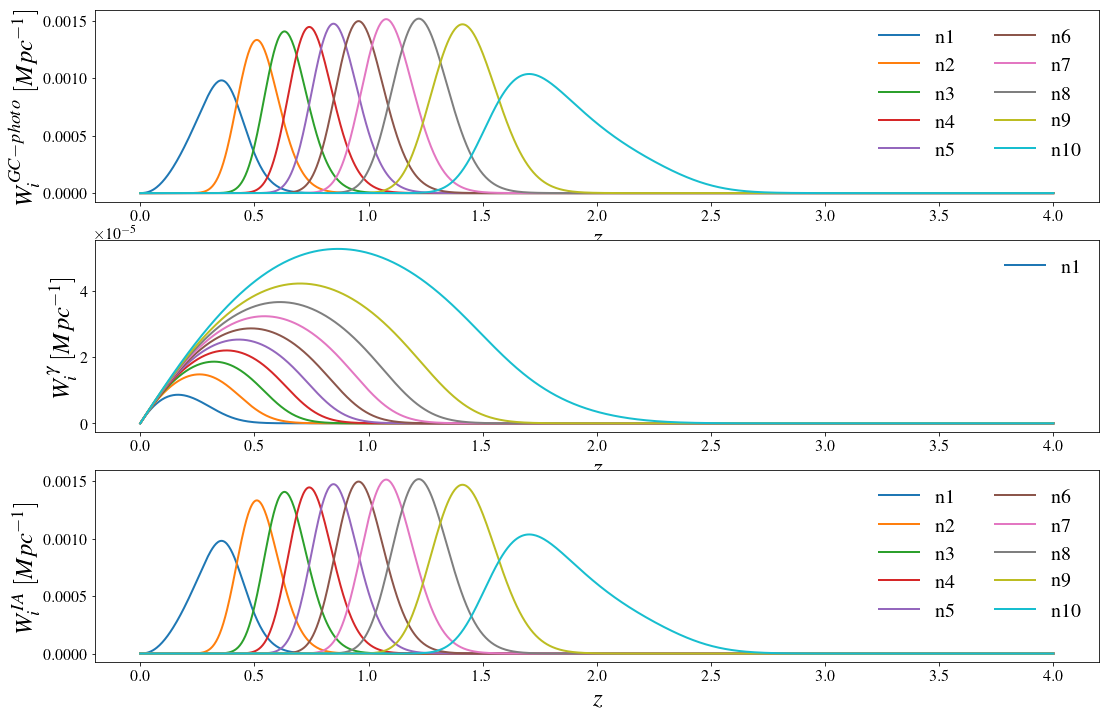

In [296]:
import matplotlib.colors as mcolors
color = list(mcolors.TABLEAU_COLORS.values())
fig, axs = plt.subplots(3, 1, figsize=(18,12))
for i in range(0, 10):
    print('bin: {}'.format(i+1))
    axs[0].plot(zs, photo.GC_window(zs, i+1), '-', label='n{}'.format(i+1))
    axs[1].plot(zs, photo.WL_window(zs,  i+1), '-', color = color[i], label='n{}'.format(i+1) if i == 0 else "")
    axs[2].plot(zs, photo.IA_window(zs, i+1), label='n{}'.format(i+1))
axs[0].set_xlabel(r'$z$')
axs[0].set_ylabel(r'$W_i^{GC-photo}$ $[Mpc^{-1}]$')
axs[0].legend(frameon=False, ncol=2)
axs[1].set_xlabel(r'$z$')
axs[1].set_ylabel(r'$W_i^{\gamma}$ $[Mpc^{-1}]$')
axs[1].legend(frameon=False, ncol=2)
axs[2].set_xlabel(r'$z$')
axs[2].set_ylabel(r'$W_i^{IA}$ $[Mpc^{-1}]$')
axs[2].legend(frameon=False, ncol=2)

In [299]:
photo.Cl_WL(100,1,2)

5.788505722938521e-10

In [300]:
pwd

'/home/santiago/CosmoProjects/EuclidIST/ISTL/likelihood-implementation/notebooks'

In [301]:
#sys.path.append('../')
#from BNT import BNT


class BNT():
    def __init__(self, z, chi, n_i_z):
        self.z = z
        self.chi = chi
        self.n_i_z = n_i_z
        self.nbins = len(n_i_z)

    def get_matrix(self):

        A_list = []
        B_list = []
        for i in range(self.nbins):
            nz = self.n_i_z[i]
            A_list += [np.trapz(nz, self.z)]
            B_list += [np.trapz(nz / self.chi, self.z)]


        BNT_matrix = np.eye(self.nbins)
        BNT_matrix[1,0] = -1.

        for i in range(2,self.nbins):
            mat = np.array([ [A_list[i-1], A_list[i-2]], [B_list[i-1], B_list[i-2]] ])
            A = -1. * np.array( [A_list[i], B_list[i]] )
            soln = np.dot(np.linalg.inv(mat), A)
            BNT_matrix[i,i-1] = soln[0]
            BNT_matrix[i,i-2] = soln[1]
        
        return BNT_matrix


In [302]:
zwin = like.cosmo.cosmo_dic['z_win']
chiwin = like.cosmo.cosmo_dic['r_z_func'](zwin)

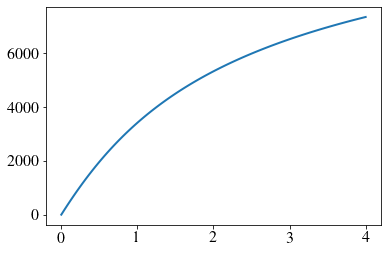

In [303]:
plt.plot(zwin, chiwin)

In [304]:
nz_dict_WL = like.likefinal.data_ins.nz_dict_WL
n_bins_list = list(nz_dict_WL.keys()) 
n_bins = len(n_bins_list)
ni_list = np.zeros((n_bins, len(zwin)))
for ii, ni in enumerate(n_bins_list):
    ni_list[ii] = nz_dict_WL[ni](zwin)

In [305]:
ni_list.shape

(10, 100)

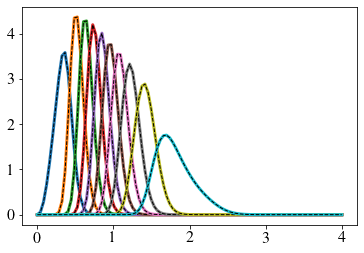

In [306]:
for ii in range(n_bins):
    plt.plot(zwin, photo.nz_GC.evaluates_n_i_z(ii+1, zwin), lw=3)
    plt.plot(zwin, ni_list[ii], ls='--', color='k', lw=1)

In [307]:
Bnt = BNT(zwin, chiwin, ni_list)
Bmat = Bnt.get_matrix()
print(Bmat)
print(Bmat.shape)

[[ 1.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [-1.          1.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.2584021  -1.25840438  1.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.59778641 -1.59778641  1.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.71792758 -1.71792758  1.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.79482466 -1.79482466  1.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.85647003 -1.85647003
   1.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.91963078
  -1.91963078  1.          0.          0.        ]
 [ 0.          0.          0.          0.       

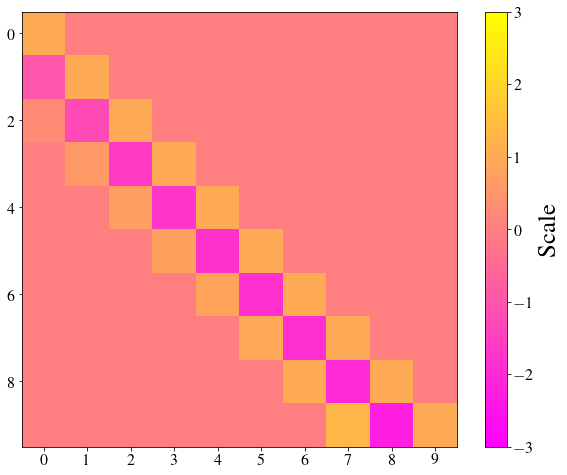

In [308]:
from matplotlib.ticker import MaxNLocator
fig, ax = plt.subplots(1, figsize=(10,8))
im = plt.imshow(Bmat, cmap="spring", vmax=3, vmin=-3)
cbar = plt.colorbar(im)
cbar.set_label("Scale")
#cbar.set_ticklabels()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))


In [309]:
#photo.z_winterp - zwin
z_interp = photo.z_winterp

In [310]:
GC_win_arr = np.array([photo.GC_window(zwin, ii+1) for ii in range(n_bins)])

In [311]:
#GC_win_arr[1]

In [312]:
GC_win_arr[:,45]

array([2.75966596e-140, 1.05510706e-020, 7.11337466e-018, 1.95020091e-015,
       3.08490109e-013, 3.61671675e-011, 3.74106957e-009, 3.96609150e-007,
       4.67036877e-005, 9.24587313e-004])

In [313]:
#q_i_array = np.array(q_i_list)
GC_win_BNT = Bmat@GC_win_arr

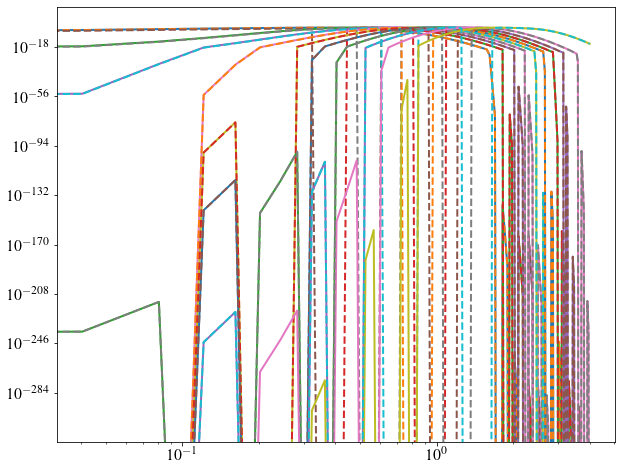

In [314]:
fig, axs = plt.subplots(1, 1, figsize=(10,8))
for Gi, Gi_B in zip(GC_win_arr, GC_win_BNT):
    plt.plot(zwin, Gi)
    plt.loglog(zwin, Gi_B, ls='--')

In [316]:
zwin_WL = photo.z_winterp
WL_win_arr = np.array([photo.WL_window(zwin_WL, i+1) for i in range(n_bins)])
IA_win_arr = np.array([photo.IA_window(zwin_WL, i+1) for i in range(n_bins)])

In [318]:
#zwin_WL

In [319]:
WL_win_arr.shape

(10, 1000)

In [321]:
IA_win_arr.shape

(10, 1000)

In [322]:
#photo.nz_WL.interpolates_n_i(1, zwin)(zwin) - ni_list[0]

In [323]:
Bmat.shape

(10, 10)

In [324]:
#WL_win_BNT = np.zeros_like(WL_win_arr)
#for j in range(len(zwin_WL)):
#	WL_win_BNT[:,j] = np.dot(Bmat, WL_win_arr[:,j])

In [326]:
WL_Bnt = (Bmat@WL_win_arr)
IA_Bnt = (Bmat@IA_win_arr)


In [327]:
#WL_win_BNT - WL_B

Text(0, 0.5, '$W_i^{\\rm{IA}}$ $[Mpc^{-1}]$')

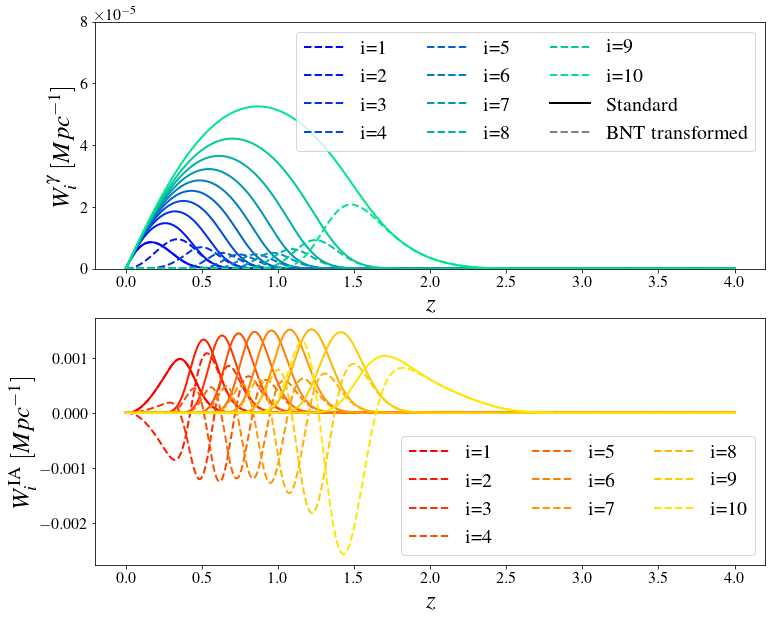

In [339]:
from matplotlib.pyplot import cm
color = iter(cm.winter(np.linspace(0, 1, 11)))
ind = iter(range(1,11))
fig, axs = plt.subplots(2, 1, figsize=(12,10))
for Wi, Wi_B in zip(WL_win_arr, WL_Bnt):
    c=next(color)
    index = next(ind)
    axs[0].plot(zwin_WL, Wi, c=c)
    axs[0].plot(zwin_WL, Wi_B, ls='--', c=c, label='i={:d}'.format(index))
axs[0].plot(zwin_WL, zwin_WL*1000, c='k', ls='-', label='Standard')
axs[0].plot(zwin_WL, zwin_WL*2000, c='grey', ls='--', label='BNT transformed')
axs[0].set_ylim(0.,8e-5)
axs[0].set_xlabel(r'$z$')
axs[0].legend(ncol=3)
axs[0].set_ylabel(r'$W_i^{\gamma}$ $[Mpc^{-1}]$')
color = iter(cm.autumn(np.linspace(0, 1, 11)))
ind = iter(range(1,11))
for Wi, Wi_B in zip(IA_win_arr, IA_Bnt):
    c=next(color)
    index = next(ind)
    axs[1].plot(zwin_WL, Wi, c=c)
    axs[1].plot(zwin_WL, Wi_B, ls='--', c=c, label='i={:d}'.format(index))
#axs[1].plot(zwin_WL, zwin_WL*1000, c='k', ls='-', label='Standard')
#axs[1].plot(zwin_WL, zwin_WL*2000, c='grey', ls='--', label='BNT transformed')
#axs[1].set_ylim(0.,8e-5)
axs[1].set_xlabel(r'$z$')
axs[1].legend(ncol=3)
axs[1].set_ylabel(r'$W_i^{\rm{IA}}$ $[Mpc^{-1}]$')

In [116]:
def C_ell_mat(ell):
    C_mat = np.zeros((n_bins,n_bins))
    for i in range(n_bins):
        for j in range(n_bins):
            C_mat[i,j] = photo.Cl_WL(ell,i+1,j+1)
    return C_mat

In [42]:
ellspace = np.linspace(10, 1000, 100)
C_ell_arr = np.zeros((len(ellspace), 10, 10))
for ie, ell in enumerate(ellspace):
    C_ell_arr[ie,:,:] = C_ell_mat(ell)

In [59]:
C_ell_BNT = np.zeros((len(ellspace), 10, 10))
for ie, ell in enumerate(ellspace):
    C_ell_BNT[ie,:,:] = Bmat@C_ell_mat(ell)@(Bmat.T)

In [60]:
C_ell_arr[:,1,1].shape

(100,)

In [61]:
C_ell_BNT[:,1,1].shape

(100,)

Text(0, 0.5, '$C^{WL}_{ij}(\\ell)$')

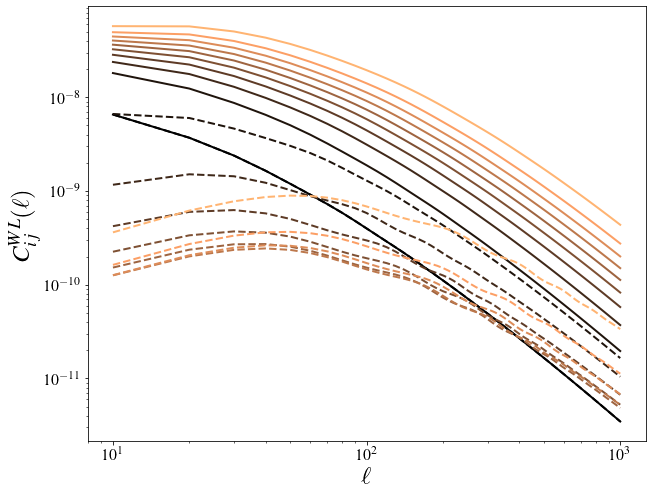

In [76]:
color = iter(cm.copper(np.linspace(0, 1, 11)))
fig, axs = plt.subplots(1, 1, figsize=(10,8))
for ij in range(n_bins):
    c=next(color)
    axs.loglog(ellspace, C_ell_arr[:,ij,ij], c=c, label='i={:d},j={:d}'.format(ij,ij))
    axs.loglog(ellspace, C_ell_BNT[:,ij,ij], c=c, ls='--')#label='i={:d},j={:d}'.format(ij,ij))

axs.set_xlabel(r'$\ell$')
axs.set_ylabel(r'$C^{WL}_{ij}(\ell)$')
#axs.legend()

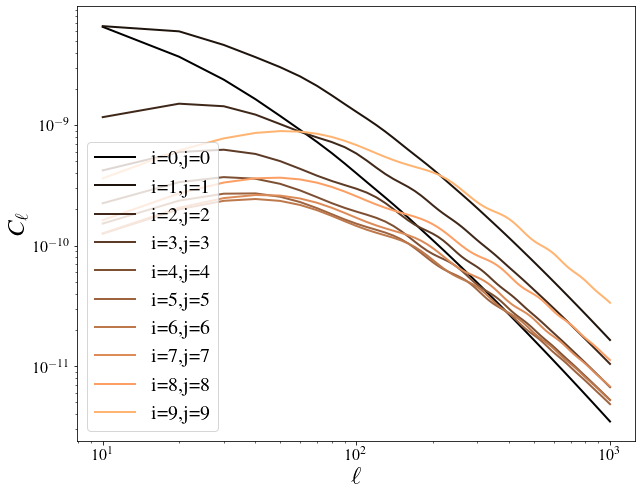

In [51]:
color = iter(cm.copper(np.linspace(0, 1, 11)))
fig, axs = plt.subplots(1, 1, figsize=(10,8))
for ij in range(n_bins):
    c=next(color)
    axs.loglog(ellspace, C_ell_BNT[:,ij,ij], c=c, label='i={:d},j={:d}'.format(ij,ij))

axs.set_xlabel(r'$\ell$')
axs.set_ylabel(r'$C_\ell$')
axs.legend()

In [117]:
from cloe.photometric_survey.photo import Photo

In [23]:
like.data

{'photo': {'IA_model': 'zNLA',
  'cov_3x2pt': 'CovMat-3x2pt-{:s}-20Bins.npy',
  'cov_GC': 'CovMat-PosPos-{:s}-20Bins.npy',
  'cov_WL': 'CovMat-ShearShear-{:s}-20Bins.npy',
  'cov_model': 'Gauss',
  'ndens_GC': 'niTab-EP10-RB00.dat',
  'ndens_WL': 'niTab-EP10-RB00.dat',
  'root_GC': 'Cls_{:s}_PosPos.dat',
  'root_WL': 'Cls_{:s}_ShearShear.dat',
  'root_XC': 'Cls_{:s}_PosShear.dat'},
 'sample': 'ExternalBenchmark',
 'spectro': {'redshifts': ['1.', '1.2', '1.4', '1.65'],
  'root': 'cov_power_galaxies_dk0p004_z{:s}.fits'}}

In [24]:
like.observables

{'selection': {'WL': {'WL': True, 'GCphot': True, 'GCspectro': False},
  'GCphot': {'GCphot': True, 'GCspectro': False},
  'GCspectro': {'GCspectro': True}},
 'specifications': {'WL': {'statistics': 'angular_power_spectrum',
   'bins': {'n1': {'n1': {'ell_range': [[20, 4000]]},
     'n2': {'ell_range': [[20, 4000]]},
     'n3': {'ell_range': [[20, 4000]]},
     'n4': {'ell_range': [[20, 4000]]},
     'n5': {'ell_range': [[20, 4000]]},
     'n6': {'ell_range': [[20, 4000]]},
     'n7': {'ell_range': [[20, 4000]]},
     'n8': {'ell_range': [[20, 4000]]},
     'n9': {'ell_range': [[20, 4000]]},
     'n10': {'ell_range': [[20, 4000]]}},
    'n2': {'n2': {'ell_range': [[20, 4000]]},
     'n3': {'ell_range': [[20, 4000]]},
     'n4': {'ell_range': [[20, 4000]]},
     'n5': {'ell_range': [[20, 4000]]},
     'n6': {'ell_range': [[20, 4000]]},
     'n7': {'ell_range': [[20, 4000]]},
     'n8': {'ell_range': [[20, 4000]]},
     'n9': {'ell_range': [[20, 4000]]},
     'n10': {'ell_range': [[20, 4

In [25]:
from cloe.like_calc.euclike import Euclike

In [26]:
likefinal = Euclike(like.data, like.observables)

/home/santiago/CosmoProjects/EuclidIST/ISTL/likelihood-implementation/cloe/photometric_survey/photo.py:162: UserWarning: Bessel tables have been set with the specified angular separations. Computing 3x2pt correlation functions at different angles will lead to unexpected outputs.
  warnings.warn('Bessel tables have been set with the specified angular '


In [27]:
likefinal.indices_diagonal_wl

[[1, 1],
 [1, 2],
 [1, 3],
 [1, 4],
 [1, 5],
 [1, 6],
 [1, 7],
 [1, 8],
 [1, 9],
 [1, 10],
 [2, 2],
 [2, 3],
 [2, 4],
 [2, 5],
 [2, 6],
 [2, 7],
 [2, 8],
 [2, 9],
 [2, 10],
 [3, 3],
 [3, 4],
 [3, 5],
 [3, 6],
 [3, 7],
 [3, 8],
 [3, 9],
 [3, 10],
 [4, 4],
 [4, 5],
 [4, 6],
 [4, 7],
 [4, 8],
 [4, 9],
 [4, 10],
 [5, 5],
 [5, 6],
 [5, 7],
 [5, 8],
 [5, 9],
 [5, 10],
 [6, 6],
 [6, 7],
 [6, 8],
 [6, 9],
 [6, 10],
 [7, 7],
 [7, 8],
 [7, 9],
 [7, 10],
 [8, 8],
 [8, 9],
 [8, 10],
 [9, 9],
 [9, 10],
 [10, 10]]

In [28]:
likefinal.indices_all

[[1, 1],
 [1, 2],
 [1, 3],
 [1, 4],
 [1, 5],
 [1, 6],
 [1, 7],
 [1, 8],
 [1, 9],
 [1, 10],
 [2, 1],
 [2, 2],
 [2, 3],
 [2, 4],
 [2, 5],
 [2, 6],
 [2, 7],
 [2, 8],
 [2, 9],
 [2, 10],
 [3, 1],
 [3, 2],
 [3, 3],
 [3, 4],
 [3, 5],
 [3, 6],
 [3, 7],
 [3, 8],
 [3, 9],
 [3, 10],
 [4, 1],
 [4, 2],
 [4, 3],
 [4, 4],
 [4, 5],
 [4, 6],
 [4, 7],
 [4, 8],
 [4, 9],
 [4, 10],
 [5, 1],
 [5, 2],
 [5, 3],
 [5, 4],
 [5, 5],
 [5, 6],
 [5, 7],
 [5, 8],
 [5, 9],
 [5, 10],
 [6, 1],
 [6, 2],
 [6, 3],
 [6, 4],
 [6, 5],
 [6, 6],
 [6, 7],
 [6, 8],
 [6, 9],
 [6, 10],
 [7, 1],
 [7, 2],
 [7, 3],
 [7, 4],
 [7, 5],
 [7, 6],
 [7, 7],
 [7, 8],
 [7, 9],
 [7, 10],
 [8, 1],
 [8, 2],
 [8, 3],
 [8, 4],
 [8, 5],
 [8, 6],
 [8, 7],
 [8, 8],
 [8, 9],
 [8, 10],
 [9, 1],
 [9, 2],
 [9, 3],
 [9, 4],
 [9, 5],
 [9, 6],
 [9, 7],
 [9, 8],
 [9, 9],
 [9, 10],
 [10, 1],
 [10, 2],
 [10, 3],
 [10, 4],
 [10, 5],
 [10, 6],
 [10, 7],
 [10, 8],
 [10, 9],
 [10, 10]]

In [29]:
likefinal.indices_diagonal_gcphot

[[1, 1],
 [1, 2],
 [1, 3],
 [1, 4],
 [1, 5],
 [1, 6],
 [1, 7],
 [1, 8],
 [1, 9],
 [1, 10],
 [2, 2],
 [2, 3],
 [2, 4],
 [2, 5],
 [2, 6],
 [2, 7],
 [2, 8],
 [2, 9],
 [2, 10],
 [3, 3],
 [3, 4],
 [3, 5],
 [3, 6],
 [3, 7],
 [3, 8],
 [3, 9],
 [3, 10],
 [4, 4],
 [4, 5],
 [4, 6],
 [4, 7],
 [4, 8],
 [4, 9],
 [4, 10],
 [5, 5],
 [5, 6],
 [5, 7],
 [5, 8],
 [5, 9],
 [5, 10],
 [6, 6],
 [6, 7],
 [6, 8],
 [6, 9],
 [6, 10],
 [7, 7],
 [7, 8],
 [7, 9],
 [7, 10],
 [8, 8],
 [8, 9],
 [8, 10],
 [9, 9],
 [9, 10],
 [10, 10]]

In [30]:
likefinal.data_ins.data_dict['XC-Phot']['ells']

array([  11.68084471,   15.93759367,   21.74559276,   29.6701506 ,
         40.48258636,   55.23530433,   75.36422742,  102.82855943,
        140.30147985,  191.43033179,  261.19162796,  356.37542849,
        486.24623623,  663.4447365 ,  905.21814998, 1235.09895242,
       1685.19535574, 2299.31648913, 3137.23646293, 4280.51234829])

In [33]:
likefinal.phot_ins.update(like.cosmo.cosmo_dic)

In [40]:
%time
likefinal.phot_ins.Cl_cross(100, 1, 3)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs


-2.939323201089687e-09

In [35]:
%%time
xc_phot_array = np.array(
                [likefinal.phot_ins.Cl_cross(ell, element[1], element[0])
                 for element in likefinal.indices_all
                 for ell in likefinal.data_ins.data_dict['XC-Phot']['ells']])

CPU times: user 553 ms, sys: 131 µs, total: 553 ms
Wall time: 552 ms


In [38]:
xc_phot_array.shape

(2000,)

In [42]:
%time
gc_phot_array = np.array(
                [likefinal.phot_ins.Cl_GC_phot(ell, element[0], element[1])
                 for element in likefinal.indices_diagonal_gcphot
                 for ell in likefinal.data_ins.data_dict['GC-Phot']['ells']])

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.58 µs


In [43]:
gc_phot_array.shape

(1100,)

In [192]:
%time
x = np.ones((10,10))
indices_all = []
for i in range(0, len(x)):
    for j in range(0, len(x)):
        indices_all.append([i + 1, j + 1])

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.53 µs


In [165]:
%time
x = np.ones((10,10))
indices_all = np.empty((10,10), dtype=object)
for i in range(0, len(x)):
    for j in range(0, len(x)):
        indices_all[i,j] = ([i + 1, j + 1])

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.1 µs


In [166]:
%time
x = np.ones((10,10))
indices_all = np.empty((10,10), dtype=object)
for i in range(0, len(x)):
    for j in range(0, len(x)):
        indices_all[i,j] = ([i + 1, j + 1])

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.34 µs


In [167]:
%time
x = np.ones((10,10))
#indices_all = np.empty((10,10), dtype=object)
indices_all = np.array([[i+1, j+1] for i in range(0,len(x)) for j in range(0,len(x))])

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.58 µs


In [168]:
indices_all

array([[ 1,  1],
       [ 1,  2],
       [ 1,  3],
       [ 1,  4],
       [ 1,  5],
       [ 1,  6],
       [ 1,  7],
       [ 1,  8],
       [ 1,  9],
       [ 1, 10],
       [ 2,  1],
       [ 2,  2],
       [ 2,  3],
       [ 2,  4],
       [ 2,  5],
       [ 2,  6],
       [ 2,  7],
       [ 2,  8],
       [ 2,  9],
       [ 2, 10],
       [ 3,  1],
       [ 3,  2],
       [ 3,  3],
       [ 3,  4],
       [ 3,  5],
       [ 3,  6],
       [ 3,  7],
       [ 3,  8],
       [ 3,  9],
       [ 3, 10],
       [ 4,  1],
       [ 4,  2],
       [ 4,  3],
       [ 4,  4],
       [ 4,  5],
       [ 4,  6],
       [ 4,  7],
       [ 4,  8],
       [ 4,  9],
       [ 4, 10],
       [ 5,  1],
       [ 5,  2],
       [ 5,  3],
       [ 5,  4],
       [ 5,  5],
       [ 5,  6],
       [ 5,  7],
       [ 5,  8],
       [ 5,  9],
       [ 5, 10],
       [ 6,  1],
       [ 6,  2],
       [ 6,  3],
       [ 6,  4],
       [ 6,  5],
       [ 6,  6],
       [ 6,  7],
       [ 6,  8],
       [ 6,  9

In [136]:
ten=np.arange(1,11)
ten

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [222]:
x, y = np.meshgrid(ten, ten)
xarr = np.arange(1,101,1)
xarr = xarr.reshape((10,10))
xarr

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
       [ 11,  12,  13,  14,  15,  16,  17,  18,  19,  20],
       [ 21,  22,  23,  24,  25,  26,  27,  28,  29,  30],
       [ 31,  32,  33,  34,  35,  36,  37,  38,  39,  40],
       [ 41,  42,  43,  44,  45,  46,  47,  48,  49,  50],
       [ 51,  52,  53,  54,  55,  56,  57,  58,  59,  60],
       [ 61,  62,  63,  64,  65,  66,  67,  68,  69,  70],
       [ 71,  72,  73,  74,  75,  76,  77,  78,  79,  80],
       [ 81,  82,  83,  84,  85,  86,  87,  88,  89,  90],
       [ 91,  92,  93,  94,  95,  96,  97,  98,  99, 100]])

In [260]:
trix = np.triu(xarr)
trix

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
       [  0,  12,  13,  14,  15,  16,  17,  18,  19,  20],
       [  0,   0,  23,  24,  25,  26,  27,  28,  29,  30],
       [  0,   0,   0,  34,  35,  36,  37,  38,  39,  40],
       [  0,   0,   0,   0,  45,  46,  47,  48,  49,  50],
       [  0,   0,   0,   0,   0,  56,  57,  58,  59,  60],
       [  0,   0,   0,   0,   0,   0,  67,  68,  69,  70],
       [  0,   0,   0,   0,   0,   0,   0,  78,  79,  80],
       [  0,   0,   0,   0,   0,   0,   0,   0,  89,  90],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 100]])

In [261]:
trix[1]

array([ 0, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [262]:
np.trim_zeros(trix[1])

array([12, 13, 14, 15, 16, 17, 18, 19, 20])

In [270]:
xarr = np.arange(1,101,1)
xarr = xarr.reshape((10,10))
trix = np.triu(xarr)
final = [] #np.empty((len(trix),1))
for tt in trix:
    tm = np.trim_zeros(tt)
    final.append(tm)
np.array(final, dtype=object)

array([array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
       array([12, 13, 14, 15, 16, 17, 18, 19, 20]),
       array([23, 24, 25, 26, 27, 28, 29, 30]),
       array([34, 35, 36, 37, 38, 39, 40]),
       array([45, 46, 47, 48, 49, 50]), array([56, 57, 58, 59, 60]),
       array([67, 68, 69, 70]), array([78, 79, 80]), array([89, 90]),
       array([100])], dtype=object)

In [271]:
xarr[np.triu_indices(10)]

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  23,  24,  25,  26,  27,  28,  29,
        30,  34,  35,  36,  37,  38,  39,  40,  45,  46,  47,  48,  49,
        50,  56,  57,  58,  59,  60,  67,  68,  69,  70,  78,  79,  80,
        89,  90, 100])

In [274]:
xarr[0,0]=ten
xarr

ValueError: setting an array element with a sequence.

In [268]:
tuple(map(tuple,(np.array(np.triu_indices_from(xarr)).T).tolist()))

((0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (4, 4),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (5, 5),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (6, 6),
 (6, 7),
 (6, 8),
 (6, 9),
 (7, 7),
 (7, 8),
 (7, 9),
 (8, 8),
 (8, 9),
 (9, 9))

In [223]:
%time
p, q = np.triu_indices_from(x)
poo = np.column_stack((p,q))
tu = []
for pi in p:
    for qi in q:
        tu.append((pi,qi))

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.3 µs


In [257]:
poo.shape

(55, 2)

In [235]:
poo[:2]

array([[0, 0],
       [0, 1]])

In [232]:
xarr[poo[:2]]

array([[[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]],

       [[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]])

In [256]:
xarr[((1,1),(1,2))]

array([12, 13])

In [251]:
poolist = poo.tolist()

In [252]:
gg=tuple(tuple(sup) for sup in poolist)

In [254]:
for ii in ten:
    for jj in ten:
        xarr[po]

IndexError: too many indices for array: array is 2-dimensional, but 55 were indexed

In [253]:
gg

((0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (4, 4),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (5, 5),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (6, 6),
 (6, 7),
 (6, 8),
 (6, 9),
 (7, 7),
 (7, 8),
 (7, 9),
 (8, 8),
 (8, 9),
 (9, 9))

In [169]:
#x, y = np.triu_indices(10)
x, y = np.meshgrid(ten,ten)
indi = np.empty((10,10), dtype=object)
for ii in ten:
    for jj in ten:
        indi[ii-1,jj-1] = np.array([ii,jj])

In [171]:
indi.flatten()

array([array([1, 1]), array([1, 2]), array([1, 3]), array([1, 4]),
       array([1, 5]), array([1, 6]), array([1, 7]), array([1, 8]),
       array([1, 9]), array([ 1, 10]), array([2, 1]), array([2, 2]),
       array([2, 3]), array([2, 4]), array([2, 5]), array([2, 6]),
       array([2, 7]), array([2, 8]), array([2, 9]), array([ 2, 10]),
       array([3, 1]), array([3, 2]), array([3, 3]), array([3, 4]),
       array([3, 5]), array([3, 6]), array([3, 7]), array([3, 8]),
       array([3, 9]), array([ 3, 10]), array([4, 1]), array([4, 2]),
       array([4, 3]), array([4, 4]), array([4, 5]), array([4, 6]),
       array([4, 7]), array([4, 8]), array([4, 9]), array([ 4, 10]),
       array([5, 1]), array([5, 2]), array([5, 3]), array([5, 4]),
       array([5, 5]), array([5, 6]), array([5, 7]), array([5, 8]),
       array([5, 9]), array([ 5, 10]), array([6, 1]), array([6, 2]),
       array([6, 3]), array([6, 4]), array([6, 5]), array([6, 6]),
       array([6, 7]), array([6, 8]), array([6, 9]), 

In [174]:
indtriu = np.triu(indi)

/tmp/ipykernel_248086/3639293193.py:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  np.where(indtriu.flatten()==0)


(array([], dtype=int64),)

In [164]:
np.indices((10,10))

array([[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
        [7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
        [8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
        [9, 9, 9, 9, 9, 9, 9, 9, 9, 9]],

       [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]])

In [116]:
uptri = np.triu(indices_all)
uptri

array([[1, 1],
       [0, 2],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0,

In [161]:
np.where(indtriu==0)

/tmp/ipykernel_248086/1329790848.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  np.where(indtriu==0)


(array([], dtype=int64),)

In [94]:
np.array(likefinal.indices_diagonal_gcphot)

array([[ 1,  1],
       [ 1,  2],
       [ 1,  3],
       [ 1,  4],
       [ 1,  5],
       [ 1,  6],
       [ 1,  7],
       [ 1,  8],
       [ 1,  9],
       [ 1, 10],
       [ 2,  2],
       [ 2,  3],
       [ 2,  4],
       [ 2,  5],
       [ 2,  6],
       [ 2,  7],
       [ 2,  8],
       [ 2,  9],
       [ 2, 10],
       [ 3,  3],
       [ 3,  4],
       [ 3,  5],
       [ 3,  6],
       [ 3,  7],
       [ 3,  8],
       [ 3,  9],
       [ 3, 10],
       [ 4,  4],
       [ 4,  5],
       [ 4,  6],
       [ 4,  7],
       [ 4,  8],
       [ 4,  9],
       [ 4, 10],
       [ 5,  5],
       [ 5,  6],
       [ 5,  7],
       [ 5,  8],
       [ 5,  9],
       [ 5, 10],
       [ 6,  6],
       [ 6,  7],
       [ 6,  8],
       [ 6,  9],
       [ 6, 10],
       [ 7,  7],
       [ 7,  8],
       [ 7,  9],
       [ 7, 10],
       [ 8,  8],
       [ 8,  9],
       [ 8, 10],
       [ 9,  9],
       [ 9, 10],
       [10, 10]])

In [78]:
C_ells_all = np.array()

array([[ 1,  1],
       [ 1,  2],
       [ 1,  3],
       [ 1,  4],
       [ 1,  5],
       [ 1,  6],
       [ 1,  7],
       [ 1,  8],
       [ 1,  9],
       [ 1, 10],
       [ 2,  1],
       [ 2,  2],
       [ 2,  3],
       [ 2,  4],
       [ 2,  5],
       [ 2,  6],
       [ 2,  7],
       [ 2,  8],
       [ 2,  9],
       [ 2, 10],
       [ 3,  1],
       [ 3,  2],
       [ 3,  3],
       [ 3,  4],
       [ 3,  5],
       [ 3,  6],
       [ 3,  7],
       [ 3,  8],
       [ 3,  9],
       [ 3, 10],
       [ 4,  1],
       [ 4,  2],
       [ 4,  3],
       [ 4,  4],
       [ 4,  5],
       [ 4,  6],
       [ 4,  7],
       [ 4,  8],
       [ 4,  9],
       [ 4, 10],
       [ 5,  1],
       [ 5,  2],
       [ 5,  3],
       [ 5,  4],
       [ 5,  5],
       [ 5,  6],
       [ 5,  7],
       [ 5,  8],
       [ 5,  9],
       [ 5, 10],
       [ 6,  1],
       [ 6,  2],
       [ 6,  3],
       [ 6,  4],
       [ 6,  5],
       [ 6,  6],
       [ 6,  7],
       [ 6,  8],
       [ 6,  9

In [71]:
x = np.arange(1,11)
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [85]:
list(map(lambda i : likefinal.phot_ins.Cl_GC_phot(100, i[0], i[1] ), indices_all))

[6.195852171273271e-06,
 2.5915237768600874e-06,
 4.991963945234647e-07,
 6.350448937275586e-08,
 5.647644988247477e-09,
 3.3135967141891317e-10,
 1.1068484352569432e-11,
 1.5972051330009198e-13,
 5.497495880771094e-16,
 7.789549001596174e-20,
 2.5915237768600874e-06,
 6.104644137016938e-06,
 3.466743856457241e-06,
 1.020186041603251e-06,
 1.8809586925854732e-07,
 2.208017432071293e-08,
 1.4928465333621353e-09,
 4.5406440698824413e-11,
 3.5382813643306934e-13,
 1.3175891076404223e-16,
 4.991963945234647e-07,
 3.466743856457241e-06,
 4.952400205924475e-06,
 3.1486026603438455e-06,
 1.1271580200508872e-06,
 2.405452757684697e-07,
 2.8874795569646237e-08,
 1.591112879835053e-09,
 2.4143948553147403e-11,
 2.071734443912528e-14,
 6.350448937275586e-08,
 1.020186041603251e-06,
 3.1486026603438455e-06,
 4.033326232574993e-06,
 2.728527708061904e-06,
 1.0473736448704693e-06,
 2.1969314413171026e-07,
 2.1179927008704294e-08,
 5.927996615358878e-10,
 1.108763934294488e-12,
 5.647644988247477e-09

TypeError: 'map' object is not callable